<a href="https://colab.research.google.com/github/Gus-1003/DataScience-Minhas_Praticas/blob/main/An%C3%A1lise_Dataset_Diabetes/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto:


CONTEUDO FOCO: Método de regreção ou Predição de dados;

- Base do conteudo: Estatátistica;
- Forma de representação: Modelo matemático;
- Lógica: Associa variáveis dependentes (Valores de saída) com independentes (Valores de entrada) buscando a partir dessa asosociação mapear uma saída;
- Fase do trabalho: Experimentação;
- OBS.: Quanto maior o grau de correlação entre os atributos, mais fácil é determinar um previsão positiva ou negativa a partir da associação deles;
- Para cada amostras existe um erro (Distância entre a reta prevista e a localização da amostra). O objetivo é reduzir ao máximo esse "erro";

> Underfitting (subajuste): Ocorre quando um modelo é muito simples para capturar os padrões presentes nos dados. Um modelo subajustado não consegue aprender com eficácia as relações entre as features e o target, resultando em um desempenho insatisfatório tanto nos dados de treinamento quanto nos dados de teste. Geralmente, ocorre quando o modelo é muito limitado em termos de complexidade ou capacidade de representação.

> Overfitting (sobreajuste): Ocorre quando um modelo se ajusta muito bem aos dados de treinamento, capturando os padrões específicos dos dados de treinamento, mas falha em generalizar para novos dados. Em outras palavras, o modelo "decora" os dados de treinamento em vez de aprender os padrões subjacentes. Isso pode levar a um desempenho ruim em dados de teste ou novos exemplos.

Em resumo, o overfitting ocorre quando o modelo é excessivamente complexo e se ajusta muito aos dados de treinamento, enquanto o underfitting ocorre quando o modelo é muito simples e não consegue aprender bem os padrões dos dados. Ambos os casos resultam em um desempenho insatisfatório na capacidade do modelo de generalizar para novos dados. O objetivo é encontrar um equilíbrio entre a simplicidade e a complexidade do modelo para obter um desempenho ótimo.

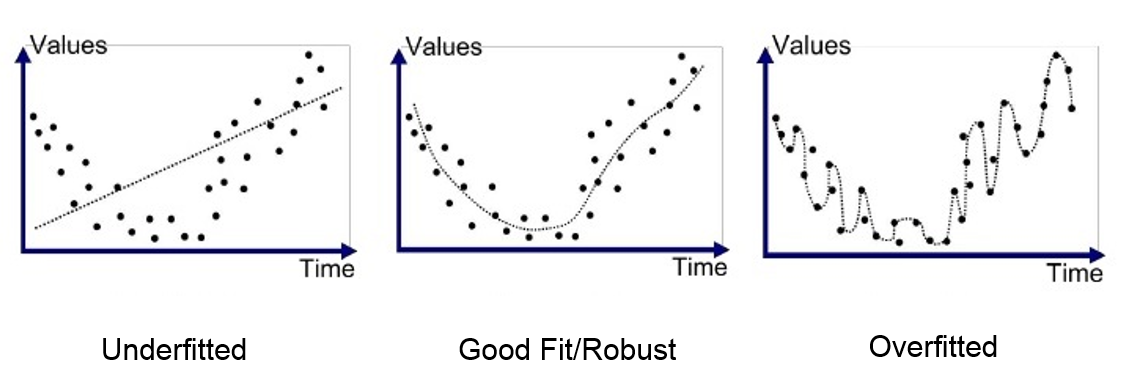

# Importando as Biblibotecas:


In [ ]:
'''As linhas abaixo importam as bibliotecas pandas, numpy, seaborn e matplotlib.pyplot.'''
import pandas as pd # manipulação e análise de dados
import numpy as np # cálculos matemáticos
import seaborn as sns # visualização de gráficos
import matplotlib.pyplot as plt # visualização de gráficos

'''Essas linhas importam a classe SelectFromModel do módulo feature_selection da biblioteca sklearn 
e a função time do módulo time.'''
from sklearn.feature_selection import SelectFromModel # A classe SelectFromModel é usada para selecionar recursos (features) com base em um modelo.
from time import time # A função time é usada para medir o tempo de execução de um trecho de código.

'''Scikit-learn é uma biblioteca de aprendizado de máquina de código aberto que suporta aprendizado supervisionado 
e não supervisionado. Ele também fornece várias ferramentas para ajuste de modelo, pré-processamento de dados, 
seleção de modelo, avaliação de modelo e muitos outros utilitários.'''
from sklearn import datasets # Você está trazendo algumas funções para carregar conjuntos de dados de exemplo que estão disponíveis na biblioteca
from sklearn import metrics  # Você está trazendo várias métricas de avaliação de modelos de aprendizado de máquina.
from sklearn.datasets import load_diabetes # A função load_diabetes permite carregar o conjunto de dados de diabetes fornecido pela biblioteca sklearn.

'''Essas linhas importam as classes cross_val_predict e LinearRegression do módulo model_selection e linear_model da 
biblioteca sklearn, respectivamente.'''
from sklearn.model_selection import cross_val_predict #  A classe cross_val_predict é usada para realizar validação cruzada e gerar previsões para cada ponto de dados.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

'''a importação do módulo linear_model do scikit-learn, você está trazendo as classes e funções relacionadas à regressão linear.'''
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

'''a importação do módulo dos outros modelos de classificação presentes no scikit-learn.'''
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Importando a base de dados:

In [ ]:
diabete = load_diabetes()

Essa linha de código carrega o conjunto de dados de diabetes usando a função load_diabetes() que foi importada anteriormente. O conjunto de dados é armazenado na variável diabete.

Ao chamar a função load_diabetes(), a biblioteca scikit-learn carrega o conjunto de dados de diabetes, que é um conjunto de dados pronto para uso, frequentemente usado para tarefas de regressão. Esse conjunto de dados contém informações médicas de pacientes com diabetes, como idade, sexo, pressão arterial e medidas do sangue, juntamente com a medida de progressão da doença após um ano.

Ao atribuir o resultado da função load_diabetes() à variável diabete, você está armazenando o conjunto de dados em uma estrutura de dados conveniente para acesso posterior. Agora você pode usar a variável diabete para acessar os recursos e rótulos (target) do conjunto de dados de diabetes.

# Explorando os Dados

## Tipo do local:

In [ ]:
'''A função type() é usada para verificar o tipo de uma variável. No caso da variável diabete, 
que foi criada após carregar o conjunto de dados de diabetes, podemos usá-la para descobrir o 
tipo dessa variável.'''

type(diabete)

sklearn.utils._bunch.Bunch

Em scikit-learn (também conhecido como sklearn), _bunch.Bunch é uma classe usada para representar um 
conjunto de dados ou um objeto contendo um conjunto de dados, metadados e outras informações relacionadas.

A classe _bunch.Bunch é usada internamente em scikit-learn para armazenar os dados de entrada e saída 
em várias funções e métodos. Ela é uma forma conveniente de organizar e manipular dados, permitindo 
que sejam acessados por meio de atributos ou chaves, semelhante a um dicionário do Python.

In [ ]:
diabete.keys() # Chaves de manipulaçãoda estrutura

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Um objeto _bunch.Bunch contém os seguintes atributos principais:

  * data: Os dados de entrada, geralmente uma matriz NumPy ou uma matriz esparsa.
  * target: Os rótulos ou valores de destino associados aos dados de entrada.
  * feature_names: Os nomes das features (atributos) em data.
  * target_names: Os nomes das classes ou categorias em target, se aplicável.
  * DESCR: Uma descrição do conjunto de dados, fornecendo informações adicionais sobre o conjunto de dados.
  * Essa estrutura _bunch.Bunch é frequentemente usada para retornar resultados de funções e métodos em scikit-learn, como em algumas funções de conjunto de dados de exemplo, onde um objeto _bunch.Bunch é retornado para fornecer acesso conveniente aos dados e metadados.

## Descrição:

In [ ]:
print(diabete['DESCR']) # Conteudos e informações pertecentes a base;

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print(diabete['feature_names']) # Nomes dos atributos (Variaveis independentes);

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(diabete['data']) # Array dos dados

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


## Coluna Alvo / Target:

Isso imprimirá os valores dos rótulos ou valores de destino associados aos dados de entrada do conjunto de dados de diabetes. Dependendo do tamanho do conjunto de dados, a saída pode ser uma matriz NumPy ou uma lista contendo os valores de destino.

Os rótulos ou valores de destino representam a variável que você deseja prever ou modelar usando os recursos (atributos) fornecidos nos dados de entrada. No caso do conjunto de dados de diabetes, os rótulos podem ser a medida de progressão da doença após um ano para cada paciente.

In [ ]:
print(diabete['target'])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

# Usando o Pandas:

## Transformando em dataframe:

In [ ]:
df = pd.DataFrame(diabete['data'], columns=diabete['feature_names'])
df['target'] = diabete['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Descrição Estatística:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## Histograma:

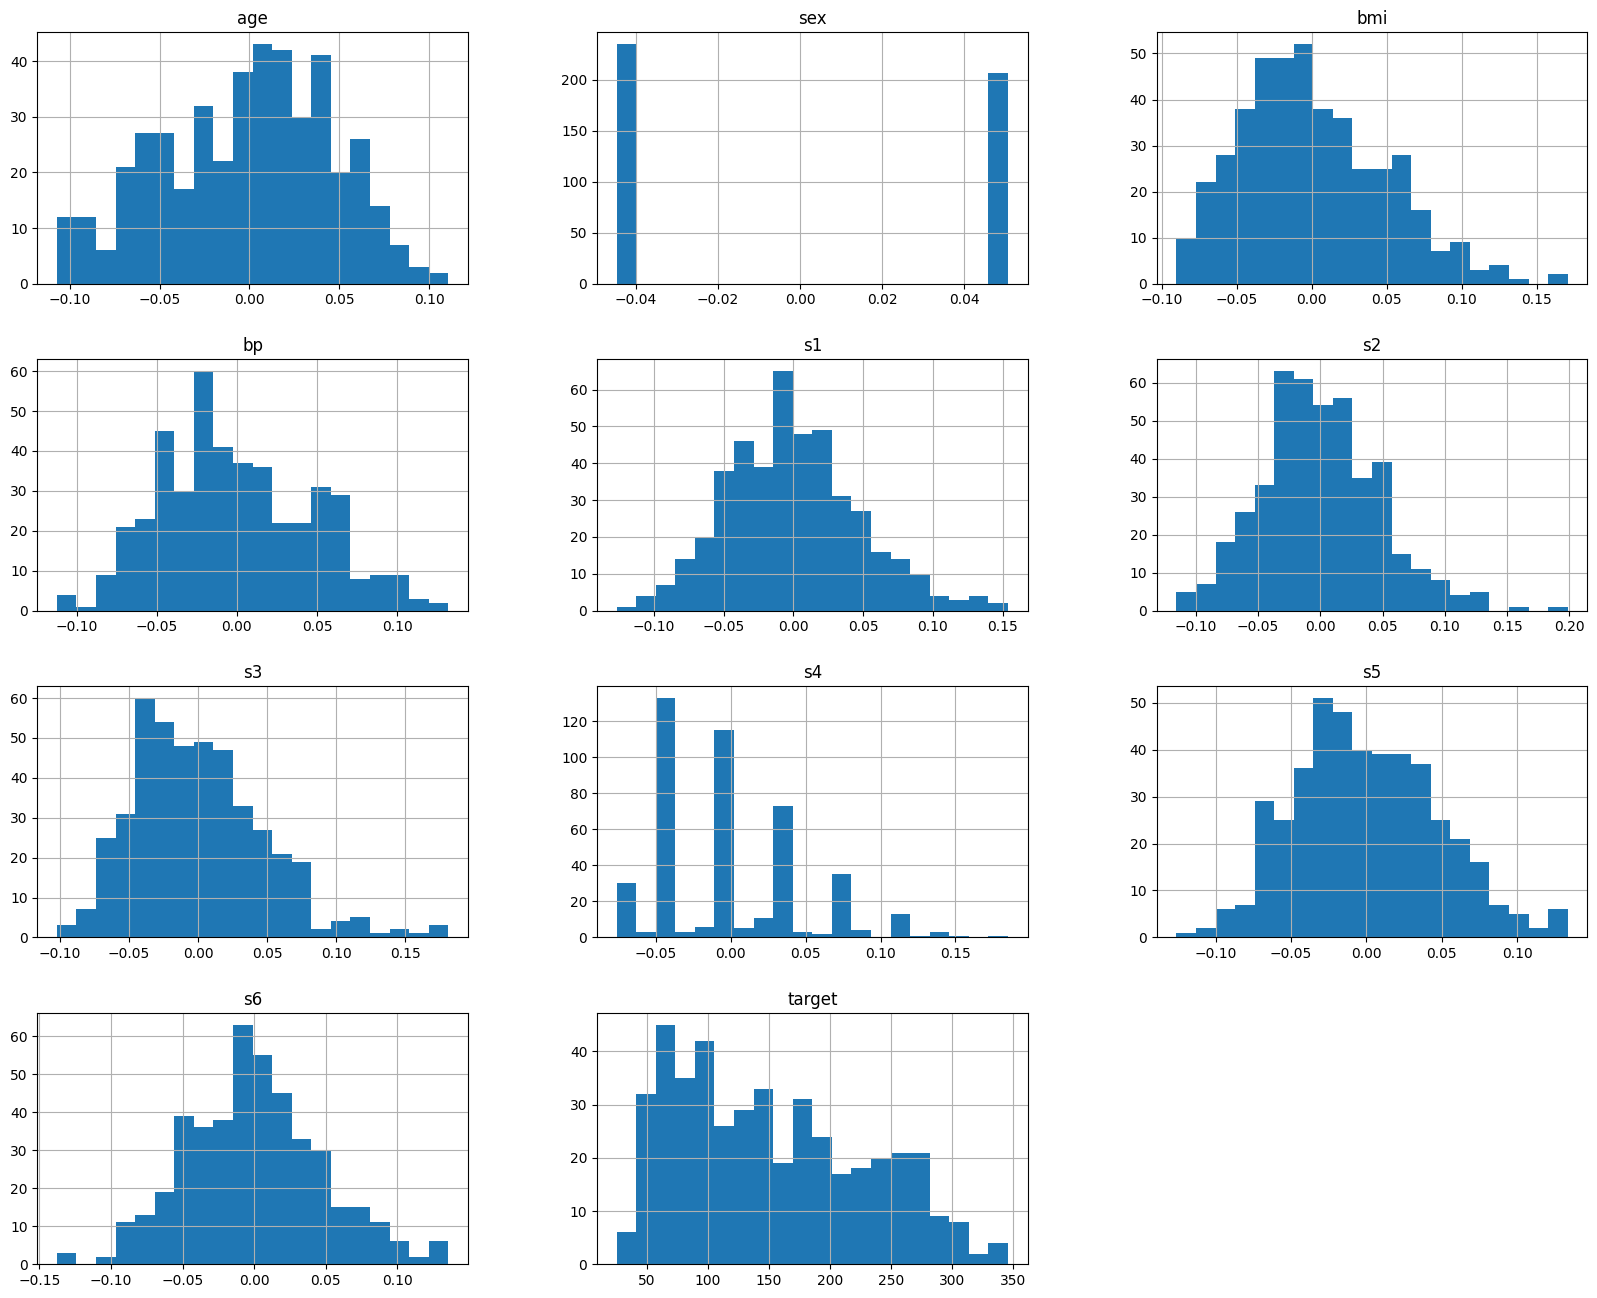

In [ ]:
df.hist(figsize=(20, 16), bins=20)
plt.show()

## Gráfico de dispersão:

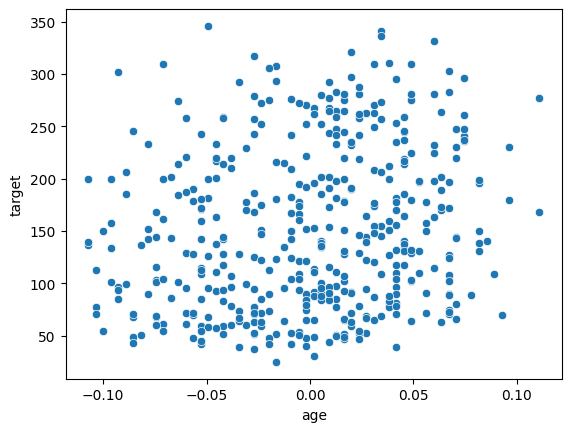

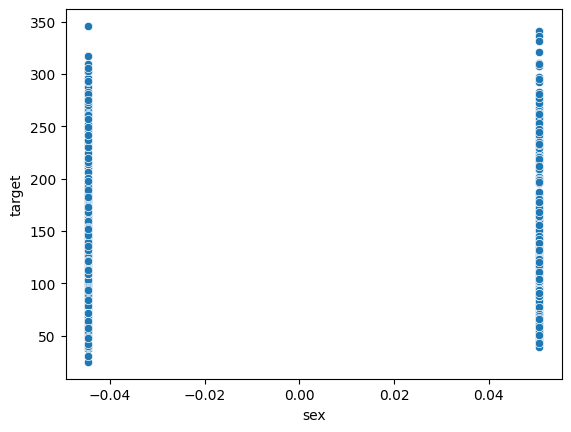

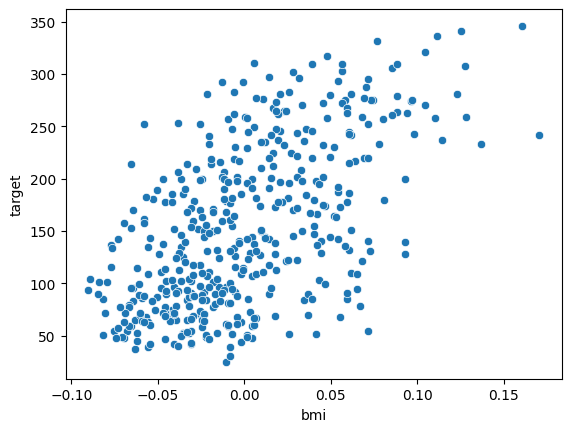

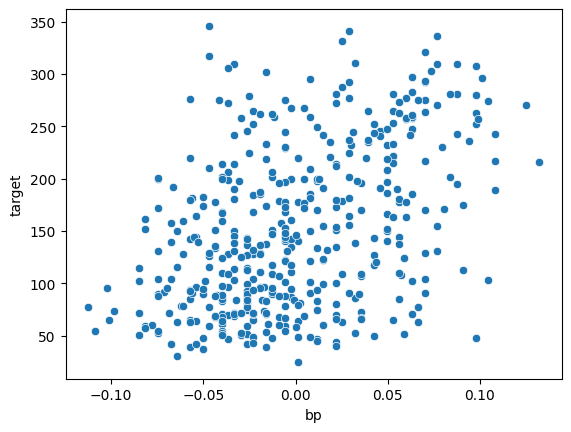

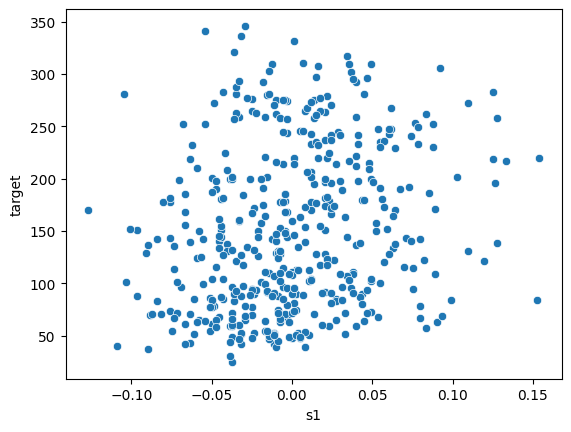

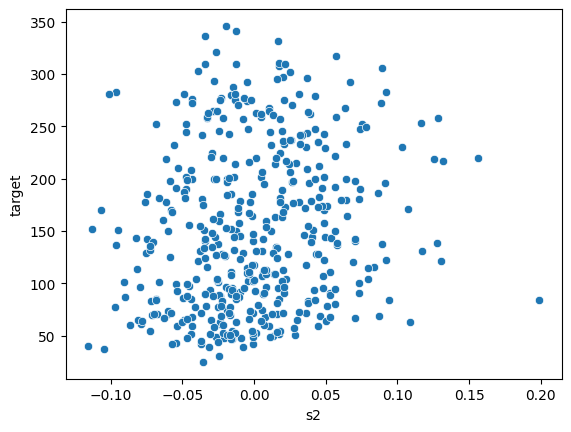

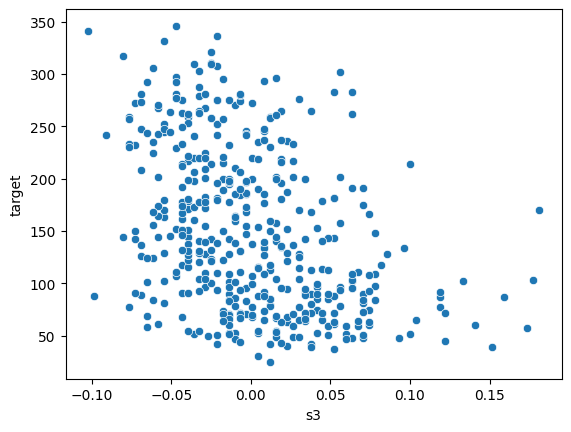

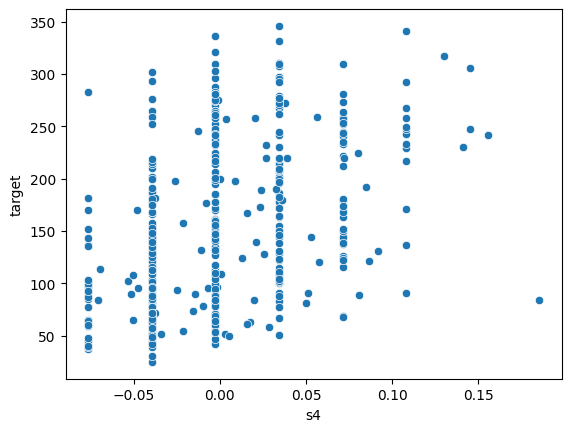

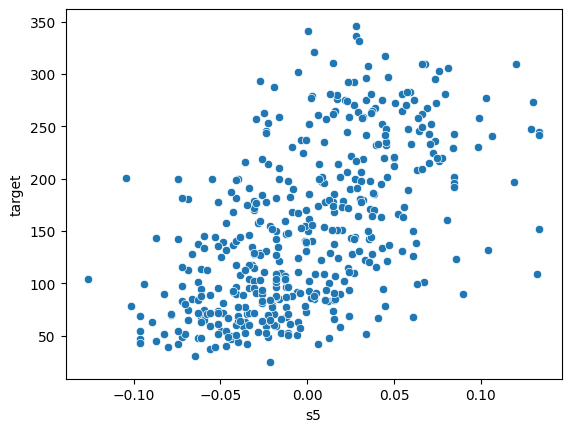

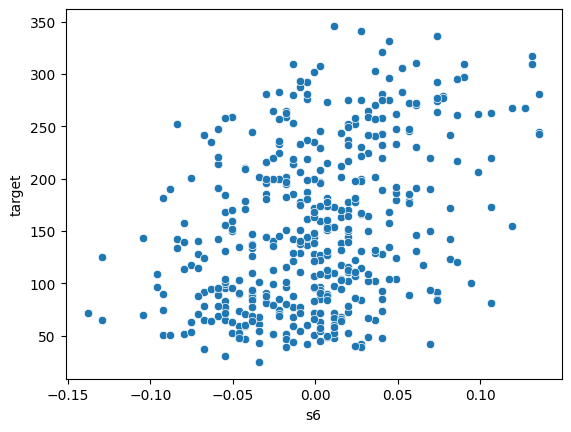

In [ ]:
for feature in diabete['feature_names']:
    sns.scatterplot(x=feature, y='target', data=df)
    plt.show()

## Correlação:

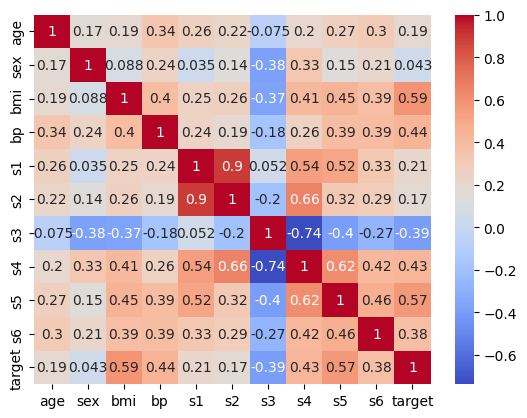

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Base para Regressão Linear:

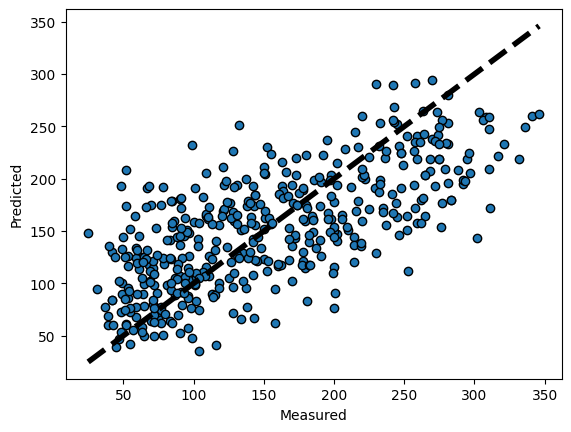

In [ ]:
''' Este comando cria uma instância do objeto LinearRegression() da biblioteca linear_model do scikit-learn. 
Esse objeto é utilizado para realizar regressão linear.'''
lr = linear_model.LinearRegression()

''' Este comando carrega o conjunto de dados de diabetes da biblioteca datasets do scikit-learn. 
Ele retorna as features (variáveis independentes) do conjunto de dados em X e o vetor de target 
(variável dependente) em y. O parâmetro return_X_y=True indica que queremos retornar tanto as 
features quanto o vetor de target.'''
X, y = datasets.load_diabetes(return_X_y=True)

''' Este comando utiliza a função cross_val_predict do scikit-learn para realizar validação cruzada. 
Ela retorna as previsões do modelo lr para cada amostra do conjunto de dados utilizando o esquema de 
validação cruzada com 10 folds (cv=10). As previsões são armazenadas na variável predicted.'''
predicted = cross_val_predict(lr, X, y, cv=10)

''' Este comando cria uma figura e um conjunto de eixos utilizando a biblioteca matplotlib.pyplot. 
A figura será usada para plotar o gráfico e os eixos serão usados para definir as propriedades do gráfico.'''
fig, ax = plt.subplots()

''' Este comando adiciona um gráfico de dispersão aos eixos definidos anteriormente. Ele plota os valores 
reais (y) no eixo x e os valores previstos (predicted) no eixo y. O parâmetro edgecolors=(0, 0, 0) define 
a cor das bordas dos pontos como preto.'''
ax.scatter(y, predicted, edgecolors=(0, 0, 0))

''' Este comando adiciona uma linha no gráfico definida pelos pontos mínimo e máximo dos valores reais (y). 
A linha é plotada com estilo pontilhado preto ('k--') e com uma largura de linha de 4 pixels (lw=4).'''
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)

ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

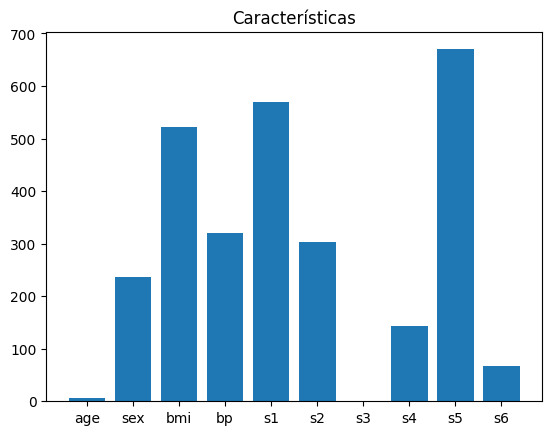

In [ ]:
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabete.feature_names)

plt.bar(height=importance, x=feature_names)
plt.title("Características")
plt.show()

In [ ]:
threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
toc = time()
print("Features selected by SelectFromModel: "
      f"{feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['s1' 's5']
Done in 0.238s


No método mais simples "Linear regression" 
Lembrando: Só possuimos 442 amostras;
- Para melhorar o grau de certeza nos resultados iremos realizar uma validação cruzada nos dados;
- Método: cross_val_predict();
- Algoritmo testado: LienarRegression();
- Dados de entrada: diabete.data;
- Dados de saída: diabete.target;
- Número de cruzamento: 10x;
- predictedCV: Armazena as predições resultantes das associações;

In [ ]:
predictedCV = cross_val_predict(LinearRegression(), diabete.data, diabete.target, cv=10)

Gráfico de dispersão:
- Eixo X: diabete.target;
- Eixo y: predictedCV

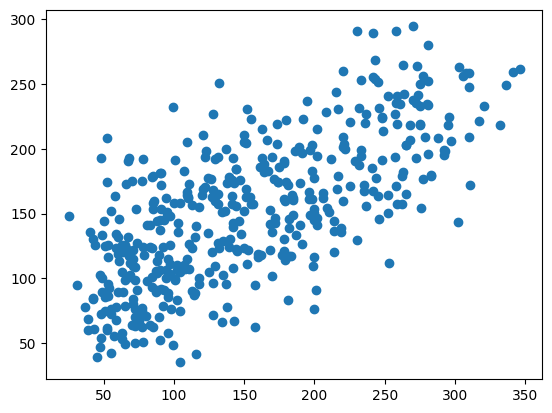

In [ ]:
plt.scatter(diabete.target, predictedCV)

# Métricas de avaliação de regressão

Algumas das métricas disponíveis no módulo metrics incluem:

Para problemas de classificação:
* accuracy_score: Calcula a acurácia, que é a proporção de amostras corretamente classificadas.

* precision_score: Calcula a precisão, que é a proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos positivos.

* recall_score: Calcula o recall, que é a proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos negativos.

* f1_score: Calcula a média harmônica entre precisão e recall, fornecendo uma métrica balanceada entre os dois.

* confusion_matrix: Calcula a matriz de confusão, que mostra as contagens de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

Métricas da avaliações:

* ERRO = distancia dos valores supostos e preditos; 
* MAE: Erro Absoluto Médio -> É uma métrica mais realista;
* MSE: Erro Quadrático Médio -> Enfatiza os outliers;
* RMSE: Raiz do Erro Quadrático Médio;



In [ ]:
print('MAE:', metrics.mean_absolute_error(diabete.target, predictedCV))
print('MSE:', metrics.mean_squared_error(diabete.target, predictedCV))
print('RMSE:', np.sqrt(metrics.mean_squared_error(diabete.target, predictedCV)))

MAE: 44.2144692224941
MSE: 2999.04150550394
RMSE: 54.76350523390499


*OBSERVAÇÃO*: Levando em conta a amplitude dos resultados (0 - 350) temos que uma média de erro de 44.21 se demonstra como altissima aos nossos padrões.

In [ ]:
kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True -> embaralha os dados

linearRegression_result = cross_val_score(LinearRegression(), diabete.data, diabete.target, cv=kfold) #scoring (métrica) padrão é r2

print(f'LinearRegression R2: {linearRegression_result.mean():.2f} +- {linearRegression_result.std():.2f}')

LinearRegression R2: 0.46 +- 0.11


## Classe Runregression:

In [ ]:
class runregression:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: quantidade de folds da validação cruzada

    Guarda as métricas de cada execução em resultados e 
    Mostra os valores médios com desvio padrão para as métricas (mostraresultadomedio)   
  '''

  def __init__(self, X, y, model, cv = 5):
    
    self.__resultados = {
      'MAE': [],
      'MSE': [],
      'RMSE': [],
      'R2': []
    }

    print(f'validação cruzada com {cv} folds')
    self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    kf = KFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in kf.split(X, y):
      model.fit(X[train_index], y[train_index])
      pred = model.predict(X[test_index])
      self.__resultados['MAE'].append(metrics.mean_absolute_error(y[test_index], pred))
      self.__resultados['MSE'].append(metrics.mean_squared_error(y[test_index], pred))
      self.__resultados['RMSE'].append(np.sqrt(metrics.mean_squared_error(y[test_index], pred)))
      self.__resultados['R2'].append(metrics.r2_score(y[test_index], pred))

  def mostraresultadomedio(self):
    print(f"MAE: {np.mean(self.__resultados['MAE']):.2f} +- {np.std(self.__resultados['MAE']):.2f}")
    print(f"MSE: {np.mean(self.__resultados['MSE']):.2f} +- {np.std(self.__resultados['MSE']):.2f}")
    print(f"RMSE: {np.mean(self.__resultados['RMSE']):.2f} +- {np.std(self.__resultados['RMSE']):.2f}")
    print(f"R2: {np.mean(self.__resultados['R2']):.2f} +- {np.std(self.__resultados['R2']):.2f}")

# Aplicação de Modelos Supervisionados:

### Regreção Linear

In [ ]:
cross_validation_RL = runregression(diabete.data, diabete.target, LinearRegression(), cv = 10)
cross_validation_RL.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 44.06 +- 3.80
MSE: 2967.72 +- 436.32
RMSE: 54.33 +- 3.98
R2: 0.49 +- 0.09


### KNN regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabete.data, diabete.target, test_size=0.33)

#define os parâmetros a serem testados com o KNN
param_grid_knn = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
#cria o objeto do gridsearchcv
gridknn = GridSearchCV(KNeighborsRegressor(), param_grid_knn,  cv = 10, verbose = 1) 
#executa o gridsearchcv para a base separando X e y
gridknn.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
gridknn.best_params_

{'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

In [ ]:
pred = gridknn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 50.02188644226552
MSE: 3748.50525489147
RMSE: 61.22503781045358
R2: 0.4241763960403703


In [ ]:
knn = gridknn.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_knn = runregression(diabete.data, diabete.target, knn, cv = 10)
cross_validation_knn.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 46.33 +- 4.16
MSE: 3390.87 +- 633.51
RMSE: 57.98 +- 5.39
R2: 0.41 +- 0.12


### SVM regressor


In [ ]:
param_grid_svm = {
    'C': [1, 10, 100], 
    'gamma': ['auto', 'scale'], 
    'kernel': ['rbf', 'sigmoid']
} 
gridsvm = GridSearchCV(SVR(),param_grid_svm, verbose = 3)
gridsvm.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=1, gamma=auto, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 2/5] END ......C=1, gamma=auto, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 3/5] END ......C=1, gamma=auto, kernel=rbf;, score=-0.047 total time=   0.0s
[CV 4/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.002 total time=   0.0s
[CV 5/5] END ......C=1, gamma=auto, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 1/5] END ..C=1, gamma=auto, kernel=sigmoid;, score=-0.016 total time=   0.0s
[CV 2/5] END ..C=1, gamma=auto, kernel=sigmoid;, score=-0.034 total time=   0.0s
[CV 3/5] END ..C=1, gamma=auto, kernel=sigmoid;, score=-0.048 total time=   0.0s
[CV 4/5] END ...C=1, gamma=auto, kernel=sigmoid;, score=0.001 total time=   0.0s
[CV 5/5] END ..C=1, gamma=auto, kernel=sigmoid;, score=-0.008 total time=   0.0s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.115 total time=   0.0s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
gridsvm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [ ]:
pred = gridsvm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 45.617448720277665
MSE: 3189.3660998976948
RMSE: 56.4744729935366
R2: 0.5100681052552156


In [ ]:
svm = gridsvm.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_svm = runregression(diabete.data, diabete.target, svm, cv = 10)
cross_validation_svm.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 43.55 +- 3.04
MSE: 2986.53 +- 353.13
RMSE: 54.55 +- 3.32
R2: 0.48 +- 0.07


### MLP Regressor

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [(100, ), (13,)], #default e heurístico
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [5000, 10000]
}

gridmlp = GridSearchCV(MLPRegressor(),param_grid_mlp, verbose = 1)
gridmlp.fit(X_train,y_train)

In [ ]:
gridmlp.best_params_

In [ ]:
pred = gridmlp.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

In [ ]:
mlp = gridmlp.best_estimator_ #usa o melhor modelo encontrado pelo gridsearchcv
cross_validation_mlp = runregression(diabete.data, diabete.target, mlp, cv = 10)
cross_validation_mlp.mostraresultadomedio()